# Data Cleaning

Here is where we shall do the data cleaning of the data we performed EDA on, in `eda.ipynb`. Let's start by loading the required libraries and DataFrame.

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

df = pd.read_csv('./mc_eda.csv')
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,complain,accepted_cmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,1


Let us start by removing the `id` and the `recency` variables. The `id` is only important if we wanted to understand the behaviour of that particular customer, and not of a customer profile. `recency`, on the other hand, only tells us about how long ago the customer made a purchase, and for that reason, is also unimportant for our analysis.
While we're at it, let us also remove `complain`, which we saw was useless due to its distribution.

In [38]:
df.drop(['id', 'recency', 'complain'], axis=1, inplace=True)
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,635,88,546,172,88,88,3,8,10,4,7,0
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,11,1,6,2,1,6,2,1,1,2,5,1
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,426,49,127,111,21,42,1,8,2,10,4,1
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,11,4,20,10,3,5,2,2,0,4,6,1
4,1981,PhD,Married,58293.0,1,0,2014-01-19,173,43,118,46,27,15,5,5,3,6,5,1


Let's also rename the `mnt*` and `num*` variables for clarity.

In [39]:
df.rename({'mnt_wines': 'wines', 'mnt_fruits': 'fruits', 'mnt_meat_products': 'meat',
           'mnt_fish_products': 'fish', 'mnt_sweet_products': 'sweets', 'mnt_gold_prods': 'gold',
           'num_deals_purchases': 'deals_purchased', 'num_web_purchases': 'web_purchases',
           'num_catalog_purchases': 'catalog_purchases', 'num_store_purchases': 'store_purchases',
           'num_web_visits_month': 'web_visits'}, axis=1, inplace=True)
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,wines,fruits,meat,fish,sweets,gold,deals_purchased,web_purchases,catalog_purchases,store_purchases,web_visits,accepted_cmp
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,635,88,546,172,88,88,3,8,10,4,7,0
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,11,1,6,2,1,6,2,1,1,2,5,1
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,426,49,127,111,21,42,1,8,2,10,4,1
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,11,4,20,10,3,5,2,2,0,4,6,1
4,1981,PhD,Married,58293.0,1,0,2014-01-19,173,43,118,46,27,15,5,5,3,6,5,1


Let's now merge do the changes in `education` and `marital_status` that we discussed in `eda.ipynb`.

In [40]:
df.loc[df.education == '2n Cycle', 'education'] = 'Master'
df.loc[df.marital_status == 'YOLO', 'marital_status'] = 'Single'
df.loc[df.marital_status == 'Absurd', 'marital_status'] = 'Single'
df.loc[df.marital_status == 'Alone', 'marital_status'] = 'Single'

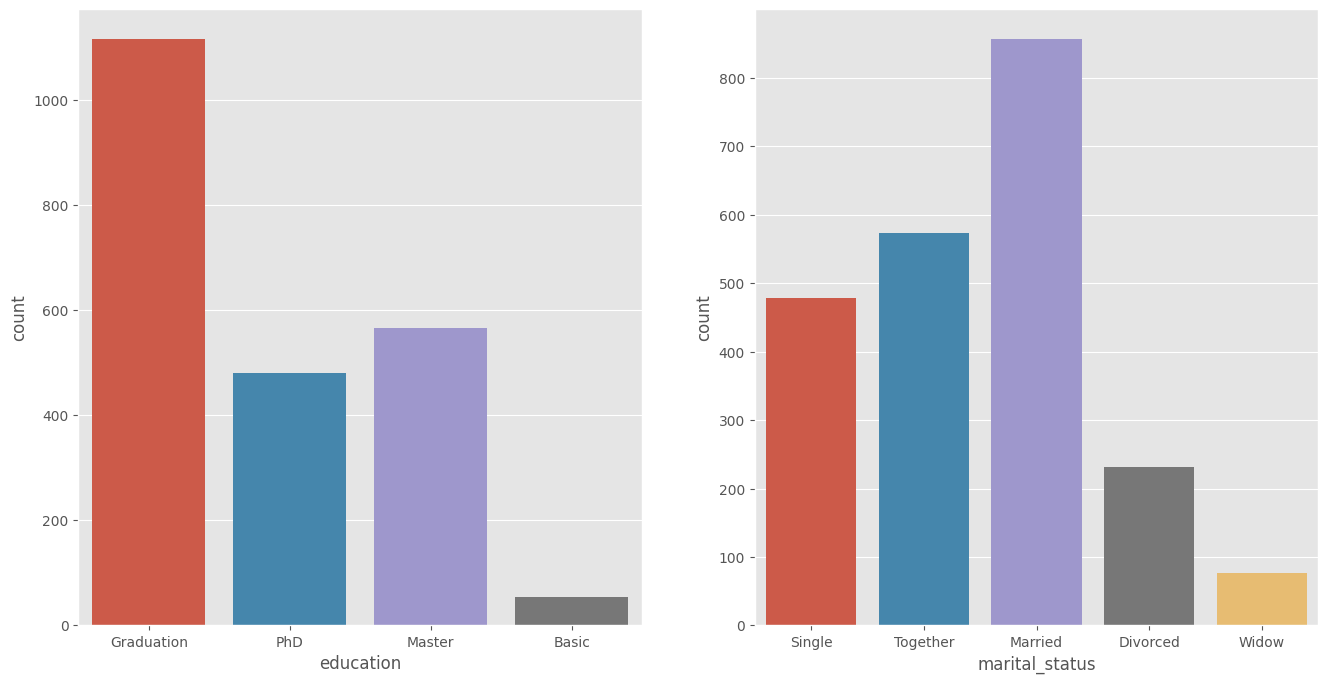

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax = ax.flatten()

_ = sns.countplot(data=df, x='education', ax=ax[0])
_ = sns.countplot(data=df, x='marital_status', ax=ax[1])

We could also join, for example, married and together, and divorced, widow, and single. But maybe those customers have different behaviours. We'll explore if that's the case or not.

Moving on, we also noticed a few values on `year_birth` and `income` that were, without a doubt, noise. We're going to remove those. We're going to leave the values that were considered as possible outliers in the `mnt` and `num` attributes for now.

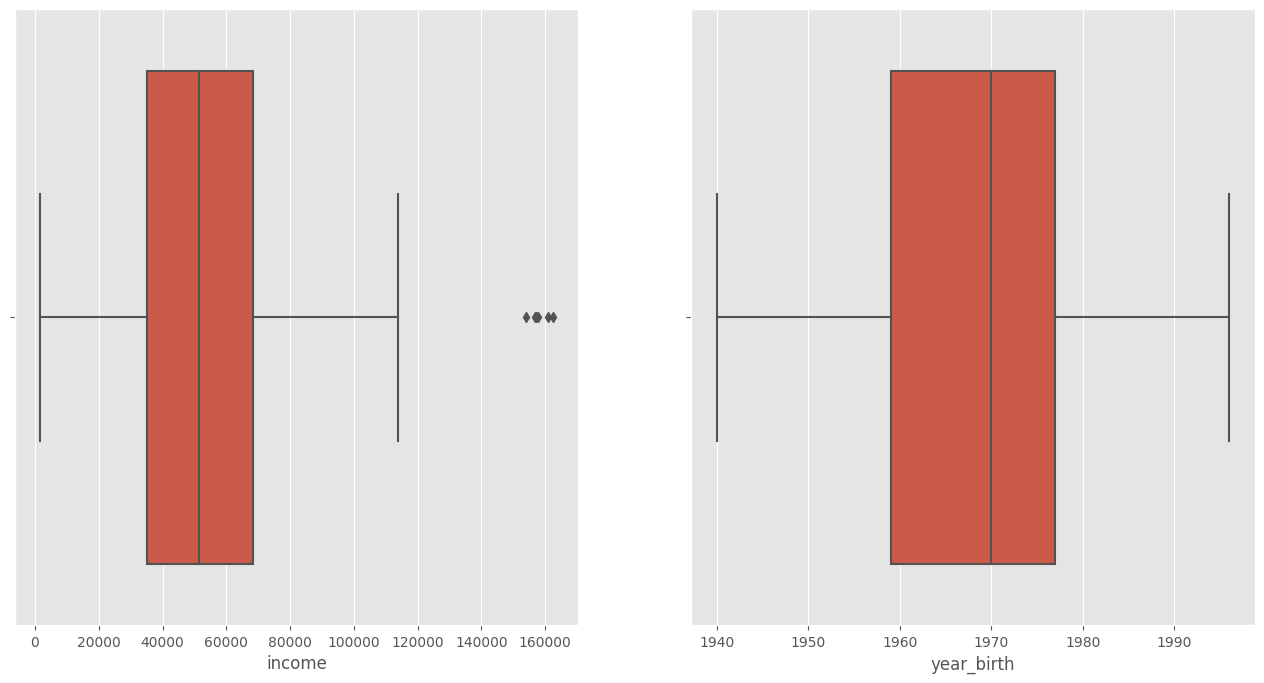

In [42]:
df = df[df.income < 600000]
df = df[df.year_birth > 1913] # excluding customers with more than 100 years of age

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax = ax.flatten()

_ = sns.boxplot(data=df, x='income', ax=ax[0])
_ = sns.boxplot(data=df, x='year_birth', ax=ax[1])

Now let's do a little bit of feature engineering.

Starting with `year_birth`, let's make it more easily interpretable by replacing it with an `age` feature.

In [43]:
import datetime as dt
df['age'] = dt.datetime.now().year - df['year_birth']
df.drop('year_birth', axis=1, inplace=True)
df.head()

,education,marital_status,income,kidhome,teenhome,dt_customer,wines,fruits,meat,fish,sweets,gold,deals_purchased,web_purchases,catalog_purchases,store_purchases,web_visits,accepted_cmp,age
0,Graduation,Single,58138.0,0,0,2012-09-04,635,88,546,172,88,88,3,8,10,4,7,0,66
1,Graduation,Single,46344.0,1,1,2014-03-08,11,1,6,2,1,6,2,1,1,2,5,1,69
2,Graduation,Together,71613.0,0,0,2013-08-21,426,49,127,111,21,42,1,8,2,10,4,1,58
3,Graduation,Together,26646.0,1,0,2014-02-10,11,4,20,10,3,5,2,2,0,4,6,1,39
4,PhD,Married,58293.0,1,0,2014-01-19,173,43,118,46,27,15,5,5,3,6,5,1,42


In [44]:
df.dt_customer = pd.to_datetime(df.dt_customer, dayfirst=True)
print("Most recent date of enrollment:", df.dt_customer.max().date())
print("Oldest date of enrollment:", df.dt_customer.min().date())

Most recent date of enrollment: 2014-06-29
Oldest date of enrollment: 2012-07-30


Now, let's create a variable with the total amount spent, another one for the size of the household, and another for the number of children a couple has.

In [47]:
df["total_spent"] = df.wines + df.fruits + df.meat + df.fish + df.sweets + df.gold

df["nr_children"] = df.teenhome + df.kidhome

df["household_size"] = df.marital_status.replace({'Single': 1, 'Divorced': 1, 'Widow': 1,
                                                   'Together': 2, 'Married': 2}) + df.nr_children
df.head()

,education,marital_status,income,kidhome,teenhome,dt_customer,wines,fruits,meat,fish,sweets,gold,deals_purchased,web_purchases,catalog_purchases,store_purchases,web_visits,accepted_cmp,age,total_spent,nr_children,household_size
0,Graduation,Single,58138.0,0,0,2012-09-04,635,88,546,172,88,88,3,8,10,4,7,0,66,1617,0,1
1,Graduation,Single,46344.0,1,1,2014-03-08,11,1,6,2,1,6,2,1,1,2,5,1,69,27,2,3
2,Graduation,Together,71613.0,0,0,2013-08-21,426,49,127,111,21,42,1,8,2,10,4,1,58,776,0,2
3,Graduation,Together,26646.0,1,0,2014-02-10,11,4,20,10,3,5,2,2,0,4,6,1,39,53,1,3
4,PhD,Married,58293.0,1,0,2014-01-19,173,43,118,46,27,15,5,5,3,6,5,1,42,422,1,3


In [48]:
df.describe()

,income,kidhome,teenhome,wines,fruits,meat,fish,sweets,gold,deals_purchased,web_purchases,catalog_purchases,store_purchases,web_visits,accepted_cmp,age,total_spent,nr_children,household_size
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,2.324593,4.088156,2.672242,5.806510,5.321429,1.311935,54.086347,607.268083,0.947559,2.593128
std,21527.278844,0.536955,0.544253,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,1.924507,2.742187,2.927542,3.250939,2.425597,1.033751,11.701599,602.513364,0.749466,0.906236
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,1.000000
25%,35233.500000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,1.000000,46.000000,69.000000,0.000000,2.000000
50%,51371.000000,0.000000,0.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,1.000000,53.000000,397.000000,1.000000,3.000000
75%,68487.000000,1.000000,1.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1.000000,64.000000,1048.000000,1.000000,3.000000
max,162397.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,5.000000,83.000000,2525.000000,3.000000,5.000000
